La ecuación de difusión unidimensional es:

\begin{equation}
\frac{\partial u}{\partial t} = \nu \frac{\partial^2 u}{\partial x^2}
\end{equation}

Donde $\nu$ es la viscosidad

In [89]:
#Incluímos las librerías que vamos a usar
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time, sys

In [90]:
class domain:
    #El constructor se encarga de hacer el preprocesamiento
    def __init__(self, L, T, c, dx, dt):       
        self.Nx = int(L/dx)                     #Número de puntos desde 0 hasta Nx
        self.x = np.linspace(0, L, self.Nx+1)   #Creo un vector que va desde el 0 hasta L con Nx divisiones
        self.dx = self.x[1]-self.x[0]           #Chequeo del dx, para que coincida

        self.Nt = int(T/dt)                     #Número de puntos desde 0 hasta Nt
        self.t = np.linspace(0, T, self.Nt+1)   #Creo un vector que va desde el 0 hasta T con Nt divisiones
        self.dt = self.t[1]-self.t[0]           #Chequeo del dt, para que coincida

        self.beta = c*self.dt/self.dx**2        #Calculo el número de Courant
        
        #Creamos dos vectores para resolver el ejercicio de manera didáctica
        self.u_fut = np.zeros(self.Nx+1)      
        self.u_pres = np.zeros(self.Nx+1)
    
    #En este método incluimos la condición inicial para t=0 en todo el dominio x
    def initialCond(self):
        self.u_fut = np.zeros(self.Nx+1)      
        self.u_pres = np.zeros(self.Nx+1)
        #Añadimos la condición inicial en la posicón del presente
        self.u_pres[int(0.5/self.dx):int(1/self.dx)+1] = 1
        
        #Graficamos la condición inicial
        plt.plot(self.x, self.u_pres)
        plt.xlabel('x[m]')
        plt.ylabel('Posición [m]')
        plt.xlim(0, L)
        plt.ylim(np.min(self.u_pres)*1.2, np.max(self.u_pres)*1.2)
        plt.title('Condiciones iniciales t=%.2f' % self.t[0])
        
    #Resolvemos el caso para todo el dominio
    def process(self):
        for n in range(1, self.Nt):
            for i in range(1, self.Nx):
                self.u_fut[i] = self.u_pres[i] + self.beta*(self.u_pres[i+1] - 2*self.u_pres[i] + self.u_pres[i-1])
                
            #Condiciones de frontera
            self.u_fut[0] = 0; self.u_fut[-1] = 0; 
            
            #Cambiamos el futuro por el presente
            self.u_pres = self.u_fut
            
    #Resolvemos el caso utilizando la vectorización
    def vector(self):
        for n in range(1, self.Nt):
            self.u_fut[1:-1] = self.u_pres[1:-1] + self.beta*(self.u_pres[2:] - 2*self.u_pres[1:-1] + self.u_pres[:-2])
            
            #Condiciones de frontera
            self.u_fut[0] = 0; self.u_fut[-1] = 0; 
            
            #Cambiamos el futuro por el presente
            self.u_pres = self.u_fut.copy() 
        
    #Este método me permite graficar la última 
    def graph(self):
        #Graficamos la condición inicial
        plt.plot(self.x, self.u_fut)
        plt.xlabel('x[m]')
        plt.ylabel('Posición [m]')
        plt.xlim(0, L)
        plt.ylim(np.min(self.u_fut)*1.2, np.max(self.u_fut)*1.2)
        plt.title('Posición de la cuerda t=%.2f' % self.t[-1])
            
    #Este método me permite resumir el preprocesamiento del dominio
    def __str__(self):
        return 'La simulación cuenta con {} puntos en x y {} puntos en t.\nEl número adimensional es {:.2f}'.format(self.Nx, self.Nt, self.beta)

In [91]:
#Definimos las propiedades y condiciones de simulación
L = 2
T = 0.8
c = 0.2
dx = 0.08
dt = 0.01

#Creo el objeto string
string = domain(L, T, c, dx, dt)
print(string)

La simulación cuenta con 25 puntos en x y 80 puntos en t.
El número adimensional es 0.31


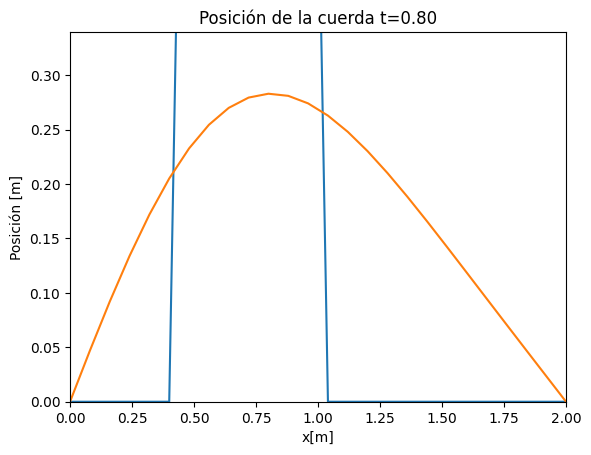

In [99]:
string.initialCond()
string.process()
string.graph()

La simulación cuenta con 40 puntos en x y 160 puntos en t.
El número adimensional es 0.40


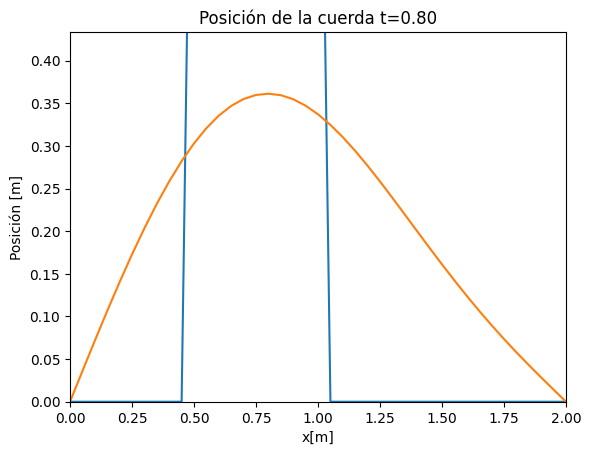

In [104]:
L = 2
T = 0.8
c = 0.2
dx = 0.05
dt = 0.005

#Creo el objeto string
string01 = domain(L, T, c, dx, dt)
print(string01)
string01.initialCond()
string01.vector()
string01.graph()

